# Election Data Analysis - Notebook 1: Data  Preparation and EDA


# Business Understanding

This notebook is part of an election data analysis project using the CRISP-DM methodology. The primary objectives are:

1. Understand voter participation trends by demographics (e.g., age, gender, education, employment status).
2. Analyze political interest and its variations across demographic groups (e.g., gender, marital status, education).
3. Investigate turnout predictions based on willingness to vote and historical trends.
4. Explore the impact of household income on voter turnout and priority issues.
5. Identify key local issues and their variation by demographics and geography (e.g., urban vs. rural).
6. Study the distribution of reasons for not voting.
7. Examine sources of political news and their usage trends across demographic groups.
8. Analyze engagement with political news and its variation by education level, gender and occupation.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In this step, we will:
- Load the dataset.
- Inspect its structure and metadata.
- Summarize key statistics.
- Check for missing or inconsistent values.

In [2]:
# Load the dataset
file_path = "Political_form_-_all_versions_-_labels_-_2023-07-01-17-04-33.xlsx"

data = pd.read_excel(file_path)

# Inspect the dataset
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4537 entries, 0 to 4536
Data columns (total 52 columns):
 #   Column                                                                                                                                                                                      Non-Null Count  Dtype         
---  ------                                                                                                                                                                                      --------------  -----         
 0   start                                                                                                                                                                                       4537 non-null   datetime64[ns]
 1   end                                                                                                                                                                                         4537 non-n

In [3]:
# First few rows of the data
data.head()

start                     end  Enrollment Number  \
0 2023-05-15 15:14:02.994 2023-05-15 15:17:11.162               4001   
1 2023-05-15 22:25:48.557 2023-05-15 22:27:44.505             800116   
2 2023-05-15 22:32:38.130 2023-05-15 22:45:09.993             800111   
3 2023-05-16 10:17:05.512 2023-05-16 10:22:31.477             800140   
4 2023-05-18 08:23:59.311 2023-05-18 08:33:17.272             800146   

                                       Location  _Location_latitude  \
0              -0.3552632 34.7552613 0.0 3000.0           -0.355263   
1              0.336606 37.5641233 1141.9 4.466            0.336606   
2  -1.153349 36.9162069 1537.5999755859375 20.0           -1.153349   
3                -1.2547935 36.9001899 0.0 20.9           -1.254793   
4             -2.6296274 38.1185042 750.603 3.9           -2.629627   

   _Location_longitude  _Location_altitude  _Location_precision  \
0            34.755261            0.000000             3000.000   
1            37.564123         1141.900000                4.466   
2            36.916207         1537.599976               20.000   
3            36.900190            0.000000               20.900   
4            38.118504          750.603000                3.900   

        Date and Time    Age  ...        _id  \
0 2023-05-15 15:14:00  50-59  ...  238327833   
1 2023-05-15 22:26:00  20-29  ...  238436622   
2 2023-05-15 22:34:00  20-29  ...  238438952   
3 2023-05-16 10:17:00  20-29  ...  238519273   
4 2023-05-18 08:27:00  20-29  ...  239059150   

                                  _uuid    _submission_time  \
0  ad968d31-2518-4884-83cf-82701c682c16 2023-05-15 12:20:00   
1  dad9bd3f-8916-4d1a-8d44-aba0a8b84dff 2023-05-15 19:27:52   
2  53fa1ac1-4153-4d3d-a875-fe5db0a0e4c6 2023-05-15 19:46:33   
3  3d7ac288-cf9b-47e2-a658-ed741ae23895 2023-05-16 07:22:46   
4  a1609008-d0b7-4f22-a170-45a9599a5d7e 2023-05-18 05:33:30   

  _validation_status _notes            _status _submitted_by  \
0                NaN    NaN  submitted_via_web    safra_data   
1                NaN    NaN  submitted_via_web    safra_data   
2                NaN    NaN  submitted_via_web    safra_data   
3                NaN    NaN  submitted_via_web    safra_data   
4                NaN    NaN  submitted_via_web    safra_data   

              __version__ _tags _index  
0  vNX83DW9mzvDcv5eBqBF7x   NaN      1  
1  vNX83DW9mzvDcv5eBqBF7x   NaN      2  
2  vNX83DW9mzvDcv5eBqBF7x   NaN      3  
3  vNX83DW9mzvDcv5eBqBF7x   NaN      4  
4  vNX83DW9mzvDcv5eBqBF7x   NaN      5  

[5 rows x 52 columns]

In [4]:
# Summarize key statistics
print("\nStatistical Summary:")
print(data.describe(include='all'))


Statistical Summary:
                                start                            end  \
count                            4537                           4537   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2023-05-30 16:45:37.614602240  2023-05-30 18:59:17.069545984   
min        2023-05-15 15:14:02.994000     2023-05-15 15:17:11.162000   
25%     2023-05-24 10:41:01.983000064  2023-05-24 12:15:47.470000128   
50%     2023-05-29 16:00:15.403000064  2023-05-29 17:22:18.801999872   
75%     2023-06-02 18:48:23.256999936  2023-06-02 22:22:58.919000064   
max        2023-07-01 12:34:35.560000     2023-07-01 12:36:33.100000   
std                               NaN                            NaN   

        Enrollment Number                                         Location  \
count        4.537000e+03          

In [5]:
# Check for missing values
print("\nMissing Values Summary:")
print(data.isnull().sum())


Missing Values Summary:
start                                                                                                                                                                                            0
end                                                                                                                                                                                              0
Enrollment Number                                                                                                                                                                                0
Location                                                                                                                                                                                         6
_Location_latitude                                                                                                                                                                               6


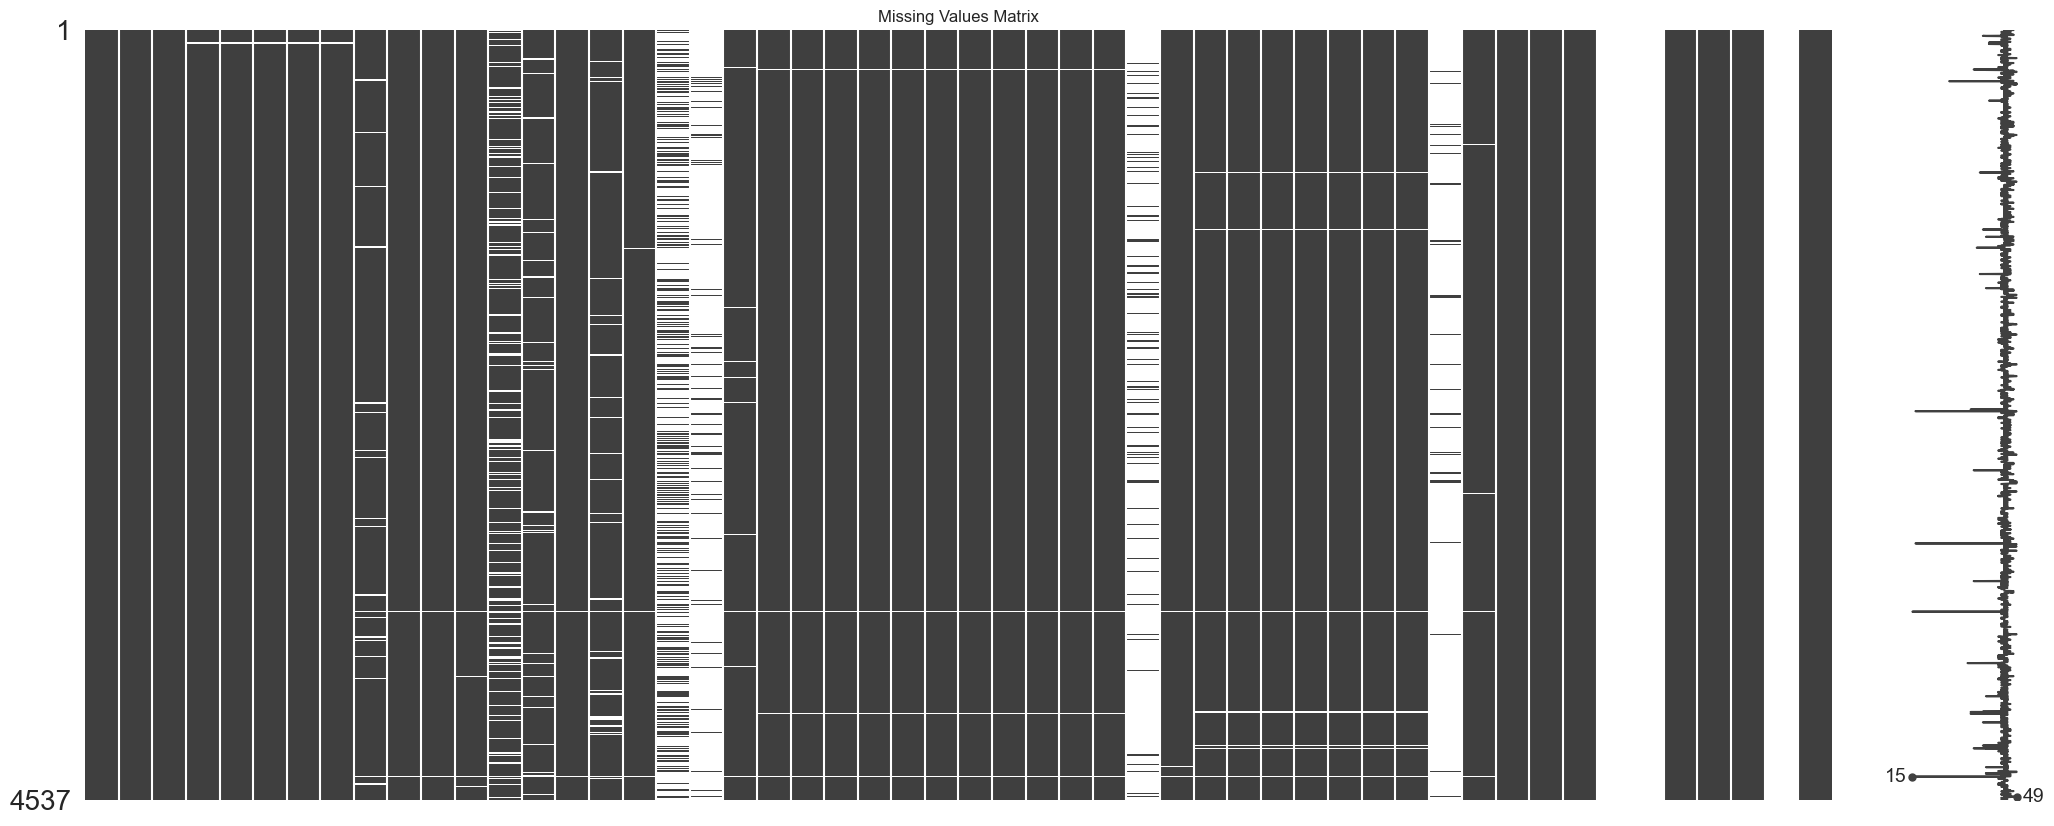

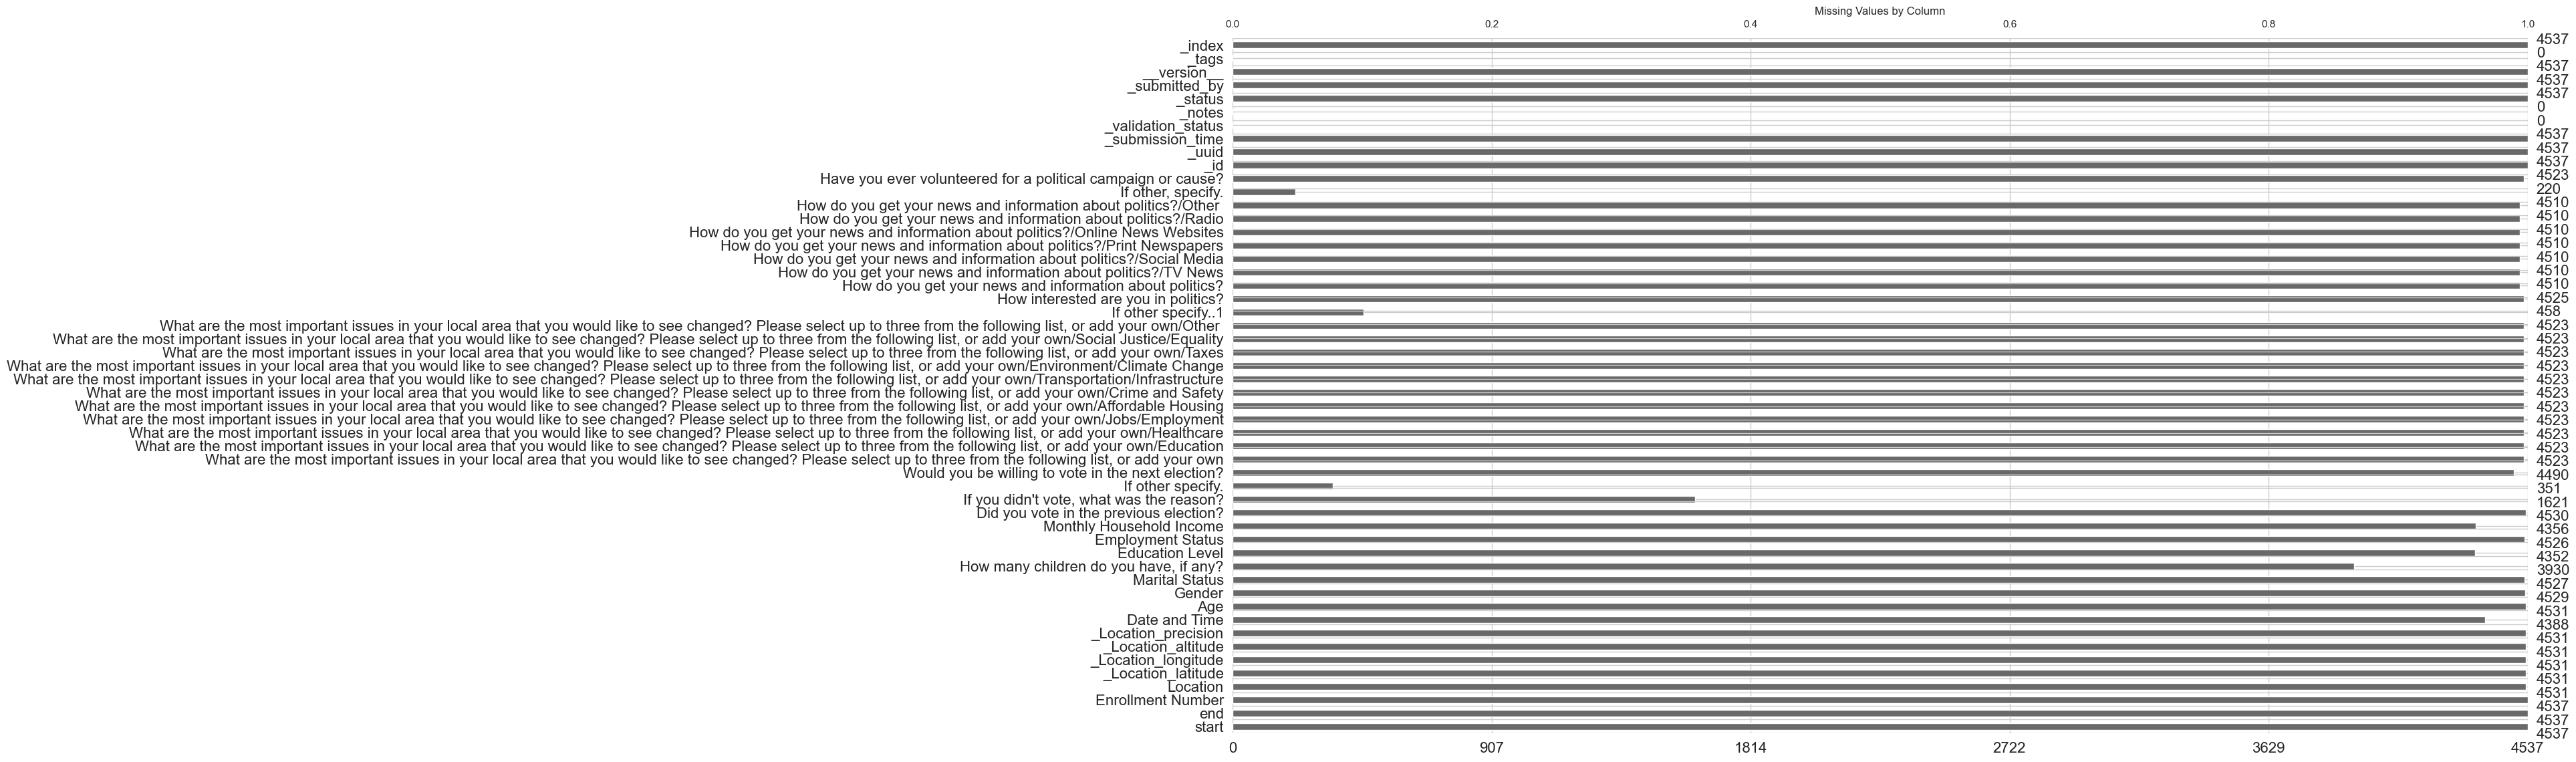

In [8]:
# Visualize missing values
import missingno as msno
msno.matrix(data)
plt.title("Missing Values Matrix")
plt.show()

msno.bar(data)
plt.title("Missing Values by Column")
plt.show()

# Data Preparation

This step includes:
1. Dropping unnecessary columns.
2. Handling missing values using tailored strategies.
3. Saving the cleaned dataset for modeling.


In [18]:
# Step 1: Drop unnecessary columns
irrelevant_columns = [
    "Date and Time", "If other specify.", "If other specify..1", "Have you ever volunteered for a political campaign or cause?",
    "start", "end", "Location", "_Location_latitude", "_Location_longitude", "_Location_altitude", "_Location_precision",
    "_id", "_uuid", "_submission_time", "_validation_status", "_notes", "_status", "_submitted_by", "__version__", "_tags",
    "_index", 'Enrollment Number'
]
data.drop(columns=irrelevant_columns, inplace=True, errors='ignore')

print("Unnecessary columns dropped.")

Unnecessary columns dropped.


### Handle missing values

In [19]:
# Drop rows with missing key demographic data
key_demographics = ['Age', 'Gender', 'Marital Status', 'Employment Status']
data.dropna(subset=key_demographics, inplace=True)
print('Dropped missing key demographics.')

# Fill missing values for "How many children do you have, if any?"
data.loc[data['Marital Status'] == 'Single', 'How many children do you have, if any?'] = 0

# Replace remaining missing values in "How many children do you have, if any?" with 0
data['How many children do you have, if any?'].fillna(0, inplace=True)
print('Filled children missing column.')

# Fill missing values in "Education Level" with "Unknown"
data['Education Level'].fillna("Unknown", inplace=True)
print('Missing education level filled with Unknown.')

# Fill missing values in "Would you be willing to vote in the next election?" with mode
data['Would you be willing to vote in the next election?']\
.fillna(data['Would you be willing to vote in the next election?'].mode()[0], inplace=True)
print('Filled willing to vote in the next general elections with mode')


Dropped missing key demographics.
Filled children missing column.
Missing education level filled with Unknown.
Filled willing to vote in the next general elections with mode


In [20]:
# Combine related issue columns into a single summary column
issue_columns = [
    "What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own",
    "What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own/Education",
    "What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own/Healthcare",
    "What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own/Jobs/Employment",
    "What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own/Affordable Housing",
    "What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own/Crime and Safety",
    "What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own/Transportation/Infrastructure",
    "What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own/Environment/Climate Change",
    "What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own/Taxes",
    "What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own/Social Justice/Equality",
    "What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own/Other"
]

# Filter existing issue columns
existing_issue_columns = [col for col in issue_columns if col in data.columns]

# Combine existing issue columns into a summary
if existing_issue_columns:
    data['Key Issues Summary'] = data[existing_issue_columns].apply(lambda row: '; '.join(row.dropna().astype(str)), axis=1)
    data.drop(columns=existing_issue_columns, inplace=True)
    print("Key issue columns combined into 'Key Issues Summary'.")
else:
    print("No matching issue columns found to combine.")

No matching issue columns found to combine.


In [21]:
# Fill missing values in "How interested are you in politics?" with mode
data['How interested are you in politics?'].fillna(data['How interested are you in politics?'].mode()[0], inplace=True)

In [22]:
# Fill missing values for news source columns with mode
news_source_columns = [
    "How do you get your news and information about politics?",
    "How do you get your news and information about politics?/TV News",
    "How do you get your news and information about politics?/Social Media",
    "How do you get your news and information about politics?/Print Newspapers",
    "How do you get your news and information about politics?/Online News Websites",
    "How do you get your news and information about politics?/Radio",
    "How do you get your news and information about politics?/Other"
]
for col in news_source_columns:
    if col in data.columns:
        data[col].fillna(data[col].mode()[0], inplace=True)


In [23]:
data.isnull().sum()

Age                                                                                                                                                                       0
Gender                                                                                                                                                                    0
Marital Status                                                                                                                                                            0
How many children do you have, if any?                                                                                                                                    0
Education Level                                                                                                                                                           0
Employment Status                                                                                                                           

In [17]:
data.head()

Enrollment Number    Age  Gender Marital Status  \
0               4001  50-59    Male        Married   
1             800116  20-29  Female         Single   
2             800111  20-29    Male         Single   
3             800140  20-29    Male         Single   
4             800146  20-29    Male         Single   

   How many children do you have, if any? Education Level Employment Status  \
0                                     3.0        Tertiary        Unemployed   
1                                     0.0        Tertiary           Student   
2                                     0.0        Tertiary        Unemployed   
3                                     0.0        Tertiary           Student   
4                                     0.0        Tertiary           Student   

  Monthly Household Income Did you vote in the previous election?  \
0          Less than 10000                                    Yes   
1          Less than 10000                                    Yes   
2          Less than 10000                                     No   
3              10001-20000                                     No   
4          Less than 10000                                    Yes   

         If you didn't vote, what was the reason?  ...  \
0  I didn't think my vote would make a difference  ...   
1                                             NaN  ...   
2                    I didn't like the candidates  ...   
3                      I was not eligible to vote  ...   
4                                             NaN  ...   

  How interested are you in politics?  \
0                          Interested   
1                          Interested   
2                 Slightly interested   
3                 Slightly interested   
4                 Slightly interested   

   How do you get your news and information about politics?  \
0                                      TV News Radio          
1          TV News Social Media Online News Websites          
2                               Online News Websites          
3                         TV News Social Media Radio          
4                                       Social Media          

  How do you get your news and information about politics?/TV News  \
0                                                1.0                 
1                                                1.0                 
2                                                0.0                 
3                                                1.0                 
4                                                0.0                 

  How do you get your news and information about politics?/Social Media  \
0                                                0.0                      
1                                                1.0                      
2                                                0.0                      
3                                                1.0                      
4                                                1.0                      

   How do you get your news and information about politics?/Print Newspapers  \
0                                                0.0                           
1                                                0.0                           
2                                                0.0                           
3                                                0.0                           
4                                                0.0                           

   How do you get your news and information about politics?/Online News Websites  \
0                                                0.0                               
1                                                1.0                               
2                                                1.0                               
3                                                0.0                               
4                                       